In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px 

In [35]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\crime_dataset_india (1).csv")
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


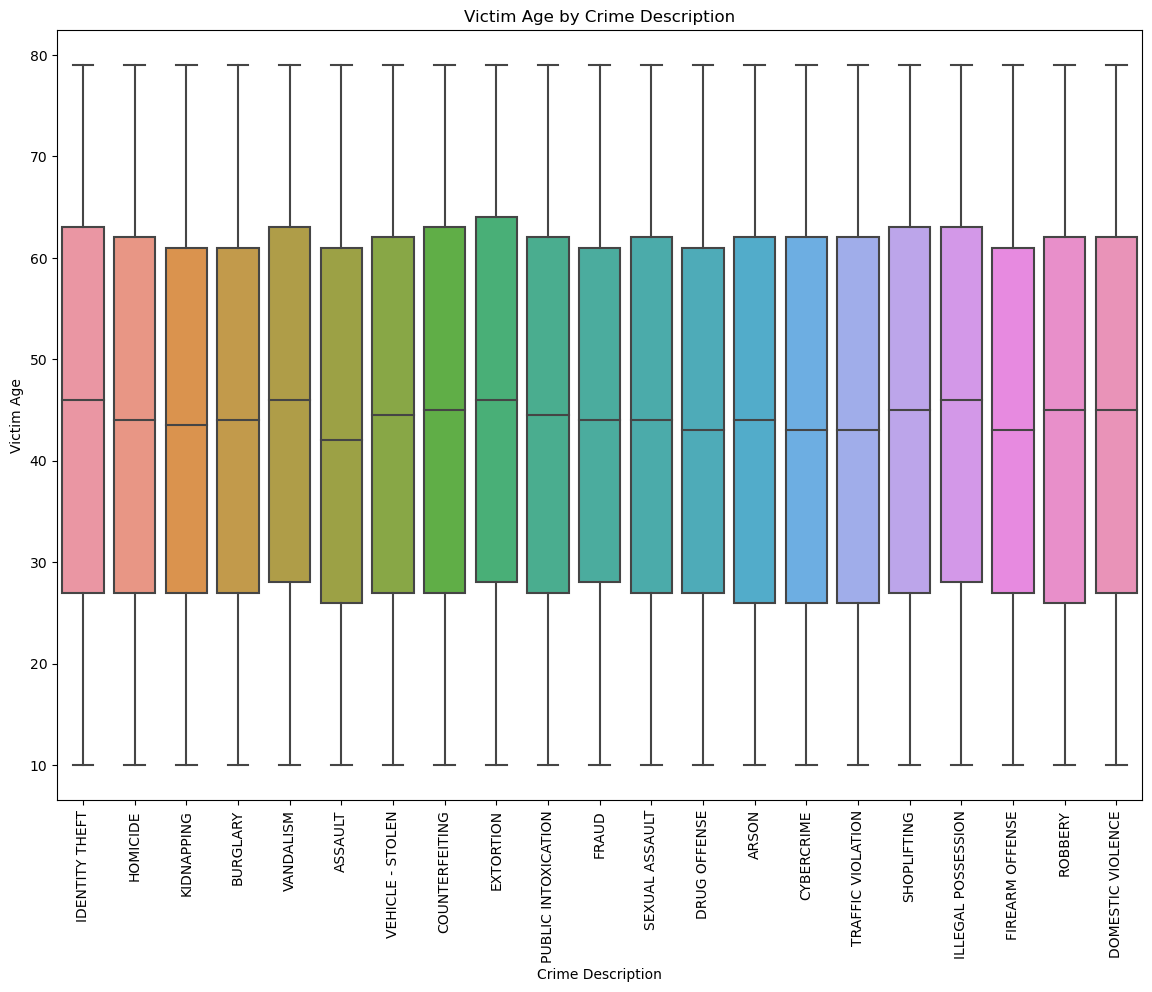

In [42]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Crime Description', y='Victim Age', data=df)
plt.xticks(rotation=90)
plt.title('Victim Age by Crime Description')
plt.xlabel('Crime Description')
plt.ylabel('Victim Age')
plt.show()

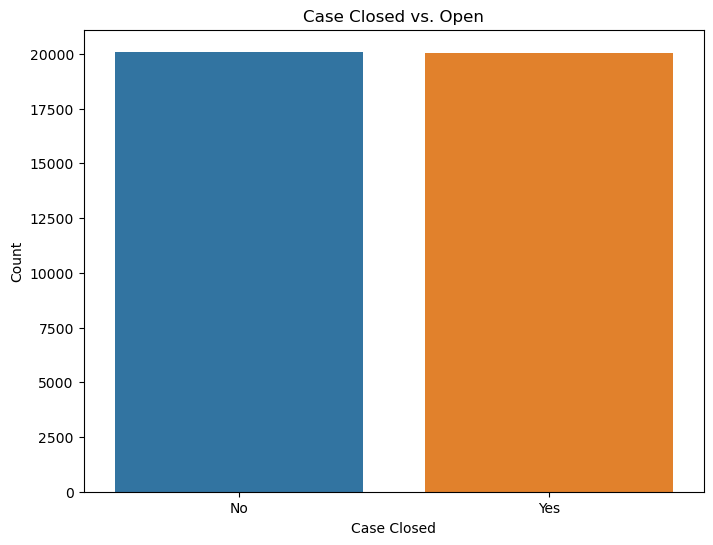

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Case Closed', data=df)
plt.title('Case Closed vs. Open')
plt.xlabel('Case Closed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

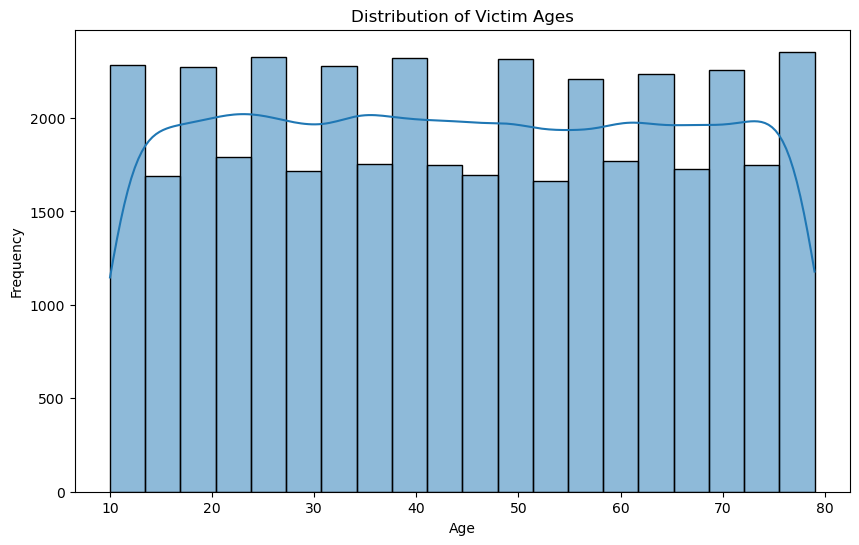

In [46]:
# Plot the distribution of Victim Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Victim Age'], bins=20, kde=True)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

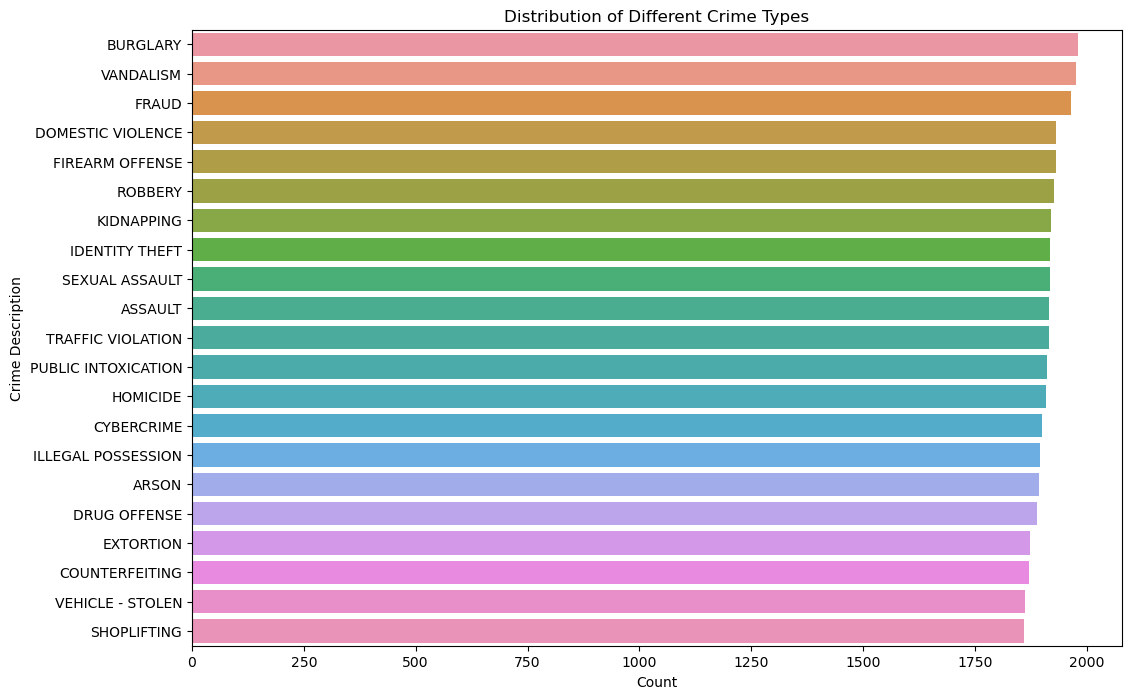

In [55]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(y='Crime Description', data=df, order=df['Crime Description'].value_counts().index)
plt.title('Distribution of Different Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.show()


In [8]:
import datetime as dt
#converting the dates into date time format
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'])

# Replace missing values in 'Date Case Closed' with values from 'Date of Occurrence'
df['Date Case Closed'] = df['Date Case Closed'].fillna(df['Date of Occurrence'])
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'])

#Add another column to estimate the no. of days to close cases
df['Days_to_close_cases']=df['Date Case Closed']-df['Date of Occurrence']

# Extract the days from the column
df['Days_to_close_cases']=df['Days_to_close_cases'].dt.days

#dropping the irrelevant columns that were used in extraction
df=df.drop(['Date Case Closed','Date of Occurrence'],axis=1)

# Convert Time of occurence column to datetime
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], format='%d-%m-%Y %H:%M')

# Extract only the time portion
df['Time'] = df['Time of Occurrence'].dt.time

# Convert time to a datetime object for easier comparison
df['Time of Occurrence_Hour'] = df['Time of Occurrence'].dt.hour

# Extract another column to create a new column based on the time
df['Time of Day'] = np.where((df['Time of Occurrence_Hour'] >= 6) & (df['Time of Occurrence_Hour'] < 12), 'Morning',
                    np.where((df['Time of Occurrence_Hour'] >= 12) & (df['Time of Occurrence_Hour'] < 16), 'Afternoon',
                    np.where((df['Time of Occurrence_Hour'] >= 16) & (df['Time of Occurrence_Hour'] < 18), 'Evening',
                    'Night')))

#dropping the actual column as it irrelevant now
df=df.drop(['Time of Occurrence_Hour','Time'],axis=1)

# creating another column -days_taken_to_report_cr. This will be Time of occurence - date reported

#convert date reported to datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M')


#extract another column to calculate the time taken to report the crime from date of occurence
df['Days_taken_to_report_cr']=df['Date Reported']-df['Time of Occurrence']

# Extract the days from the column
df['Days_taken_to_report_cr']=df['Days_taken_to_report_cr'].dt.days

#Dropping the irrelevant columns used in extraction
df=df.drop(['Date Reported','Time of Occurrence'],axis=1)

# Extract another column Of Victim Age Groups to create a new column based on time
df['Victim_age_group'] = np.where((df['Victim Age'] <= 12), 'Child',
                    np.where((df['Victim Age'] > 12) & (df['Victim Age'] < 18), 'Adolescent',
                    np.where((df['Victim Age'] >= 18) & (df['Victim Age'] < 25), 'Young Adult',
                    np.where((df['Victim Age'] >= 25) & (df['Victim Age'] < 40), 'Adult',
                    np.where((df['Victim Age'] >= 40) & (df['Victim Age'] <= 60), 'Middle Age', 'Old')))))

df=df.drop(['Crime Code','Victim Age'],axis=1)
df.head()

,Report Number,City,Crime Description,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Days_to_close_cases,Time of Day,Days_taken_to_report_cr,Victim_age_group
0,1,Ahmedabad,IDENTITY THEFT,M,Blunt Object,Violent Crime,13,No,0,Night,0,Adolescent
1,2,Chennai,HOMICIDE,M,Poison,Other Crime,9,No,0,Morning,0,Adult
2,3,Ludhiana,KIDNAPPING,F,Blunt Object,Other Crime,15,No,0,Afternoon,0,Middle Age
3,4,Pune,BURGLARY,F,Firearm,Other Crime,1,Yes,119,Afternoon,-1,Middle Age
4,5,Pune,VANDALISM,F,Other,Other Crime,18,Yes,213,Evening,0,Adult


In [9]:
df.groupby(['Crime Domain','Crime Description'])[['Report Number']].count().reset_index().sort_values(by='Report Number',ascending=False)

,Crime Domain,Crime Description,Report Number
2,Other Crime,BURGLARY,1980
13,Other Crime,VANDALISM,1975
7,Other Crime,FRAUD,1965
16,Violent Crime,DOMESTIC VIOLENCE,1932
1,Fire Accident,FIREARM OFFENSE,1931
18,Violent Crime,ROBBERY,1928
10,Other Crime,KIDNAPPING,1920
17,Violent Crime,IDENTITY THEFT,1918
19,Violent Crime,SEXUAL ASSAULT,1917
15,Violent Crime,ASSAULT,1915


In [10]:
serious_crimes = ['KIDNAPPING', 'HOMICIDE', 'DRUG OFFENSE']

df['Crime_Type'] = np.where(
    (df['Crime Domain'] == "Violent Crime") | (df['Crime Description'].isin(serious_crimes)),'serious violence', 'less violence')
safety_zones=df.groupby(['City'])['Report Number'].count().reset_index().sort_values(by=['Report Number'],ascending=False)
highZone_crimes= safety_zones[safety_zones['Report Number'] > 1500]['City'].tolist()
intermediateZones_crimes = safety_zones[(safety_zones['Report Number'] >= 700) & (safety_zones['Report Number'] <= 1500)]['City'].tolist()
lowZone_crimes = safety_zones[safety_zones['Report Number'] < 700]['City'].tolist()
conditions = [
    df['City'].isin(highZone_crimes),
    df['City'].isin(intermediateZones_crimes),
    df['City'].isin(lowZone_crimes)
]
choices = ['high crime zone', 'intermediate crime zone', 'low crime zone']
df['safety_zones'] = np.select(conditions, choices, default='unknown zone')
conditions = [
    # Unsafe conditions
    ((df['Crime_Type'] == "serious violence") & (df['safety_zones'] == "high crime zone")) |
    ((df['Crime_Type'] == "less violence") & (df['safety_zones'] == "high crime zone")),

    
    # Safe conditions
    ((df['Crime_Type'] == "less violence") & (df['safety_zones'] == "low crime zone")) |
    ((df['Crime_Type'] == "less violence") & (df['safety_zones'] == "intermediate crime zone"))|
    ((df['Crime_Type'] == "serious violence") & (df['safety_zones'] == "low crime zone"))|
    ((df['Crime_Type'] == "serious violence") & (df['safety_zones'] == "intermediate crime zone"))
]
values = ['unsafe', 'safe']
df['safety_tag'] = np.select(conditions, values, default='neutral') 

df['safety_tag'].value_counts(normalize=True)*100



safety_tag
unsafe    63.057769
safe      36.942231
Name: proportion, dtype: float64

In [11]:
df.isna().sum()

Report Number                 0
City                          0
Crime Description             0
Victim Gender                 0
Weapon Used                5790
Crime Domain                  0
Police Deployed               0
Case Closed                   0
Days_to_close_cases           0
Time of Day                   0
Days_taken_to_report_cr       0
Victim_age_group              0
Crime_Type                    0
safety_zones                  0
safety_tag                    0
dtype: int64

In [12]:
df['Weapon Used'] = df['Weapon Used'].fillna('0')



In [13]:
df.groupby(['Crime Domain','Crime Description'])[['Report Number']].count().reset_index().sort_values(by='Report Number',ascending=False)

,Crime Domain,Crime Description,Report Number
2,Other Crime,BURGLARY,1980
13,Other Crime,VANDALISM,1975
7,Other Crime,FRAUD,1965
16,Violent Crime,DOMESTIC VIOLENCE,1932
1,Fire Accident,FIREARM OFFENSE,1931
18,Violent Crime,ROBBERY,1928
10,Other Crime,KIDNAPPING,1920
17,Violent Crime,IDENTITY THEFT,1918
19,Violent Crime,SEXUAL ASSAULT,1917
15,Violent Crime,ASSAULT,1915


In [14]:
df.value_counts()

Report Number  City       Crime Description  Victim Gender  Weapon Used   Crime Domain      Police Deployed  Case Closed  Days_to_close_cases  Time of Day  Days_taken_to_report_cr  Victim_age_group  Crime_Type        safety_zones             safety_tag
1              Ahmedabad  IDENTITY THEFT     M              Blunt Object  Violent Crime     13               No           0                    Night         0                       Adolescent        serious violence  high crime zone          unsafe        1
26777          Ahmedabad  SHOPLIFTING        F              Explosives    Other Crime       10               Yes          36                   Afternoon     1                       Old               less violence     high crime zone          unsafe        1
26770          Delhi      SEXUAL ASSAULT     X              Other         Violent Crime     12               No           0                    Night         1                       Middle Age        serious violence  high crime zon

In [15]:
df['City'] = df['City'].str.upper()

df['City']

0        AHMEDABAD
1          CHENNAI
2         LUDHIANA
3             PUNE
4             PUNE
           ...    
40155      KOLKATA
40156       MUMBAI
40157       KANPUR
40158        PATNA
40159        DELHI
Name: City, Length: 40160, dtype: object

In [16]:
Victim_Gender_counts = df['Victim Gender'].value_counts()
Victim_Gender_counts

Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64

In [17]:
df.head()


,Report Number,City,Crime Description,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Days_to_close_cases,Time of Day,Days_taken_to_report_cr,Victim_age_group,Crime_Type,safety_zones,safety_tag
0,1,AHMEDABAD,IDENTITY THEFT,M,Blunt Object,Violent Crime,13,No,0,Night,0,Adolescent,serious violence,high crime zone,unsafe
1,2,CHENNAI,HOMICIDE,M,Poison,Other Crime,9,No,0,Morning,0,Adult,serious violence,high crime zone,unsafe
2,3,LUDHIANA,KIDNAPPING,F,Blunt Object,Other Crime,15,No,0,Afternoon,0,Middle Age,serious violence,intermediate crime zone,safe
3,4,PUNE,BURGLARY,F,Firearm,Other Crime,1,Yes,119,Afternoon,-1,Middle Age,less violence,high crime zone,unsafe
4,5,PUNE,VANDALISM,F,Other,Other Crime,18,Yes,213,Evening,0,Adult,less violence,high crime zone,unsafe


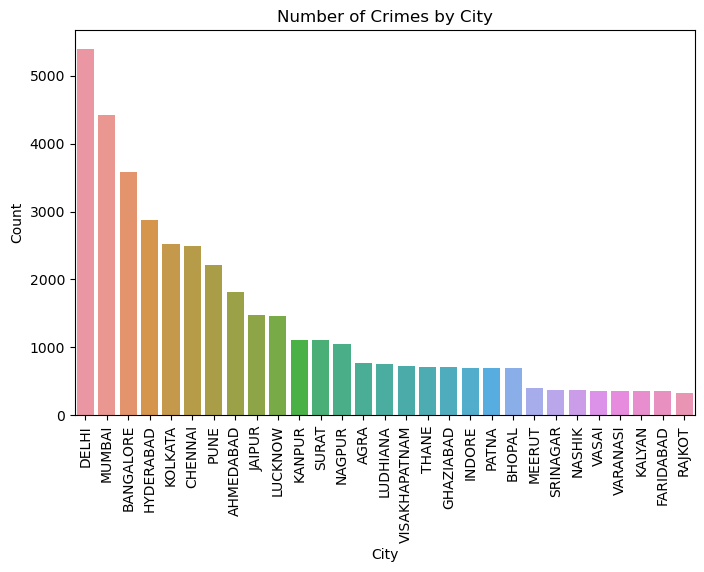

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='City', data=df, order=df['City'].value_counts().index)
plt.title('Number of Crimes by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

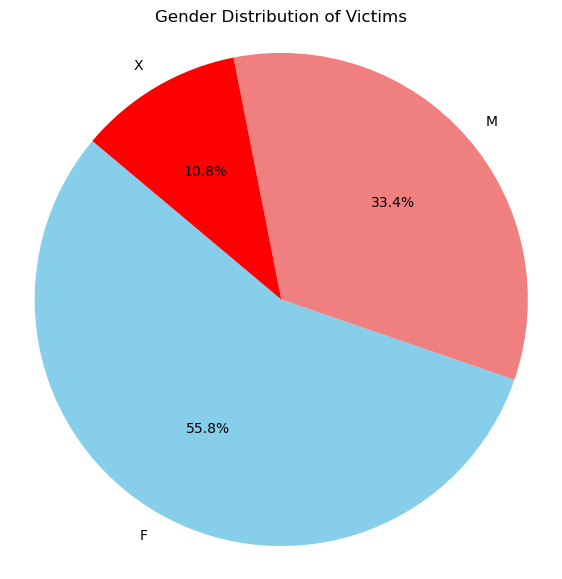

In [19]:
plt.figure(figsize=(7, 7))
plt.pie(df['Victim Gender'].value_counts(), labels=df['Victim Gender'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral','red'])
plt.title('Gender Distribution of Victims')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

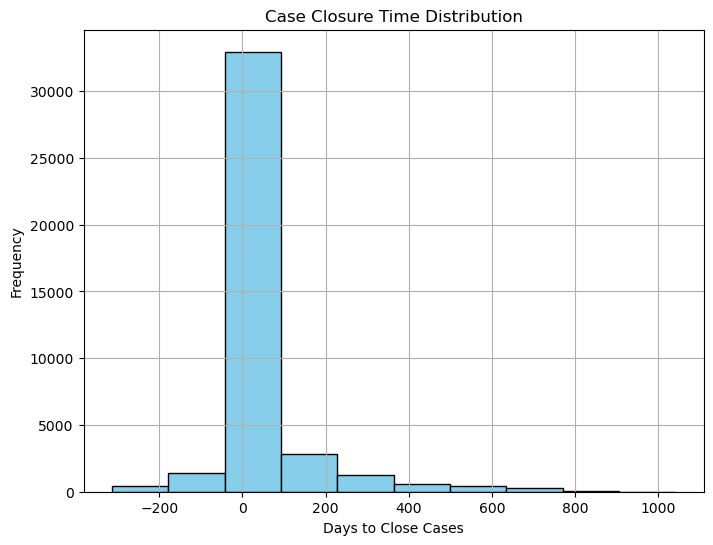

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df['Days_to_close_cases'], bins=10, color='skyblue', edgecolor='black')
plt.title('Case Closure Time Distribution')
plt.xlabel('Days to Close Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

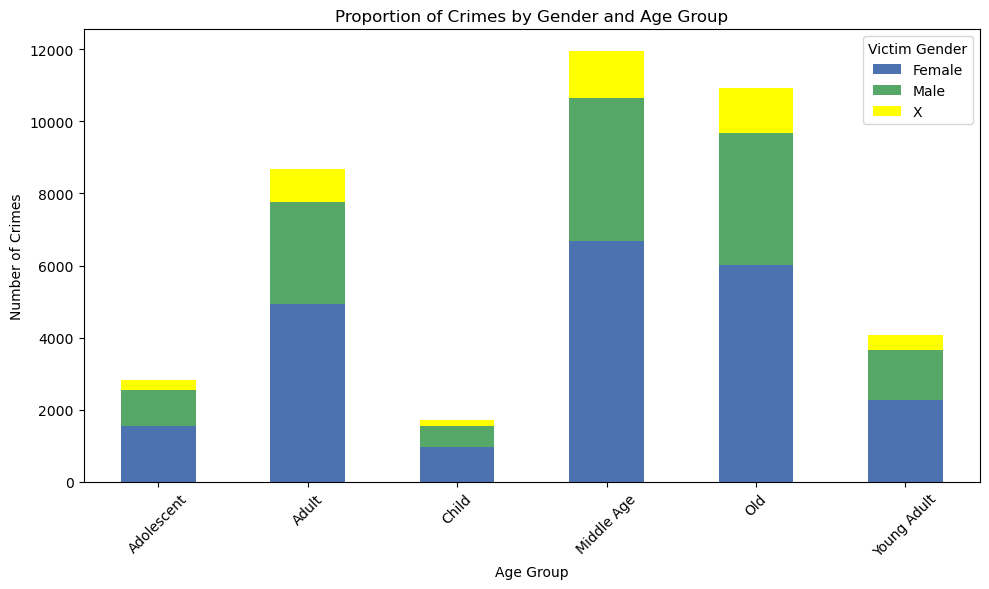

In [21]:
gender_age_crosstab = pd.crosstab(df['Victim_age_group'], df['Victim Gender'])

# Plot a stacked bar chart
gender_age_crosstab.plot(kind='bar', stacked=True, color=['#4C72B0', '#55A868','yellow'], figsize=(10, 6))

# Add title and labels
plt.title('Proportion of Crimes by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Victim Gender', labels=['Female', 'Male','X'])

# Show plot
plt.tight_layout()
plt.show()

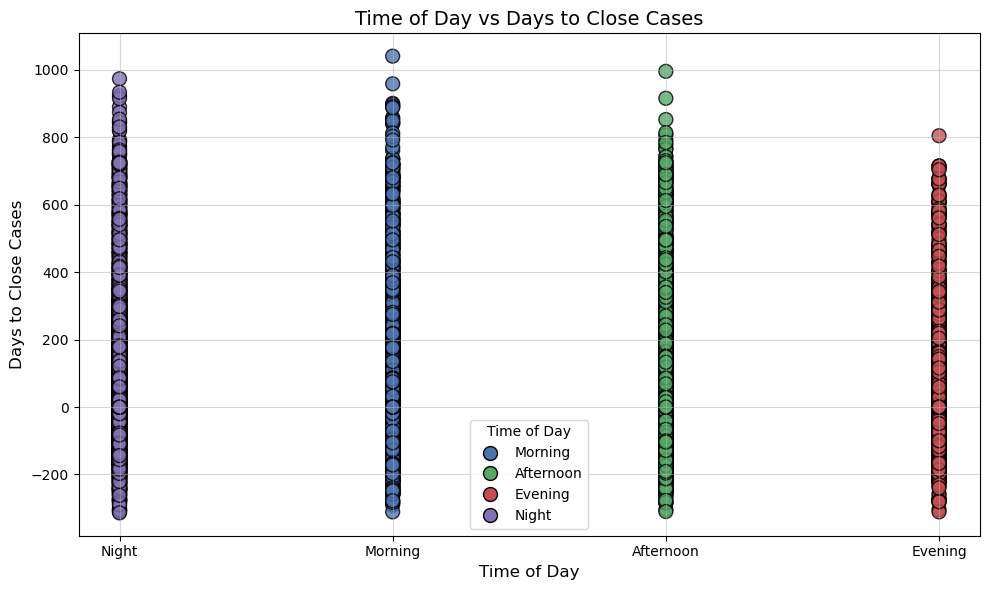

In [22]:
time_of_day_colors = {
    'Morning': '#4C72B0',
    'Afternoon': '#55A868',
    'Evening': '#C44E52',
    'Night': '#8172B2'
}
df['Color'] = df['Time of Day'].map(time_of_day_colors)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Time of Day'], df['Days_to_close_cases'], 
            c=df['Color'], s=100, alpha=0.8, edgecolor='k')

# Add labels and title
plt.title('Time of Day vs Days to Close Cases', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Days to Close Cases', fontsize=12)

# Customize the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10,
                      markerfacecolor=value, markeredgecolor='k') for key, value in time_of_day_colors.items()]
plt.legend(handles=handles, title='Time of Day', fontsize=10)

# Show plot
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

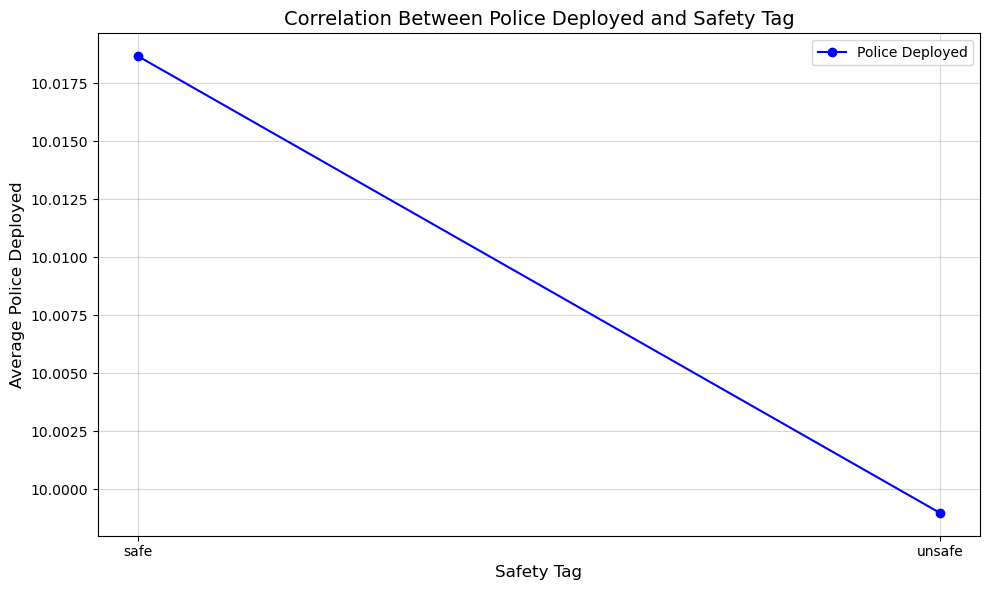

In [23]:
grouped_data = df.groupby('safety_tag')['Police Deployed'].mean()

# Sort by safety tags for better visualization
grouped_data = grouped_data.sort_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b', label='Police Deployed')

# Add labels, title, and legend
plt.title('Correlation Between Police Deployed and Safety Tag', fontsize=14)
plt.xlabel('Safety Tag', fontsize=12)
plt.ylabel('Average Police Deployed', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

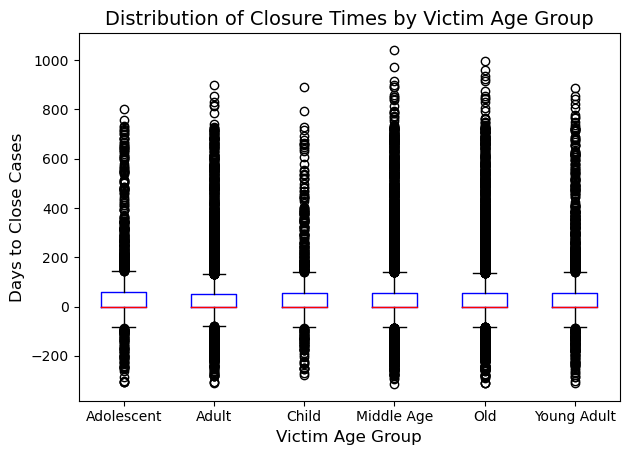

In [24]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Days_to_close_cases', by='Victim_age_group', grid=False, color=dict(boxes='b', whiskers='black', medians='red', caps='black'))

# Add title and labels
plt.title('Distribution of Closure Times by Victim Age Group', fontsize=14)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Victim Age Group', fontsize=12)
plt.ylabel('Days to Close Cases', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

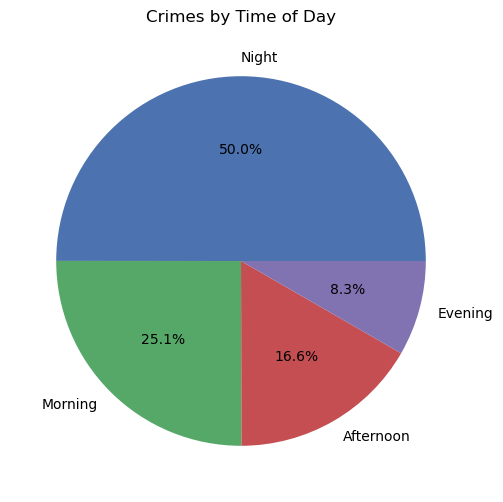

In [25]:
plt.figure(figsize=(8, 6))
time_of_day_counts = df['Time of Day'].value_counts()
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
plt.title('Crimes by Time of Day')
plt.show()


<Figure size 1000x600 with 0 Axes>

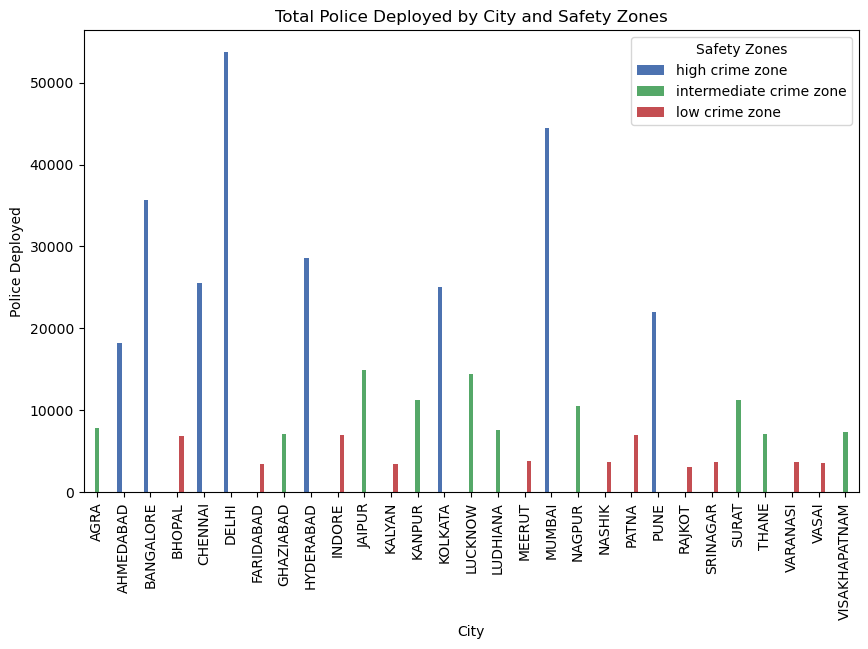

In [26]:
plt.figure(figsize=(10, 6))
police_deployment = df.groupby(['City', 'safety_zones'])['Police Deployed'].sum().sort_values()
police_deployment.unstack().plot(kind='bar', stacked=False, color=['#4C72B0', '#55A868', '#C44E52'], figsize=(10, 6))
plt.title('Total Police Deployed by City and Safety Zones')
plt.xlabel('City')
plt.ylabel('Police Deployed')
plt.legend(title='Safety Zones')
plt.show()


<Figure size 1000x600 with 0 Axes>

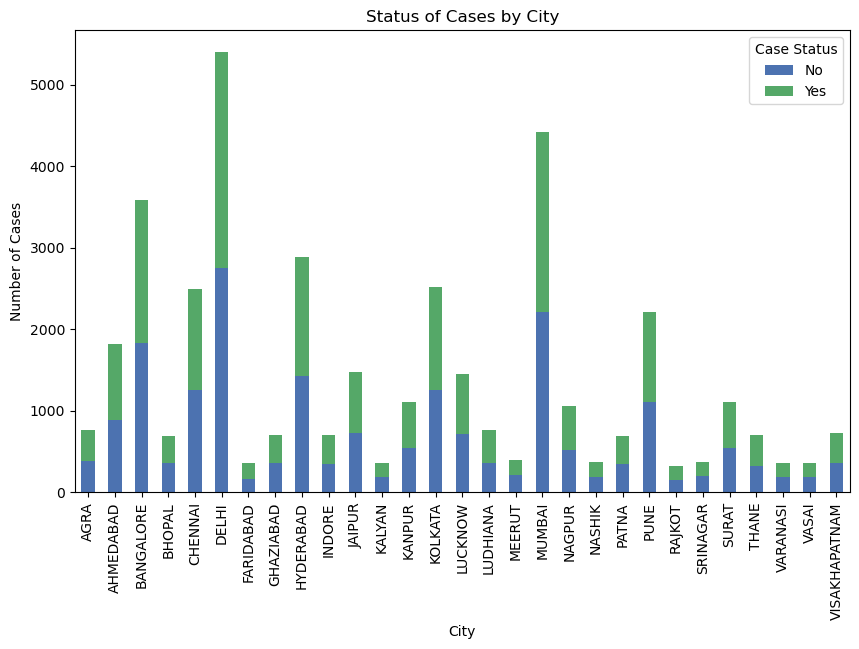

In [27]:
plt.figure(figsize=(10, 6))
case_status_counts = df.groupby(['City', 'Case Closed']).size().unstack(fill_value=0)
case_status_counts.plot(kind='bar', stacked=True, color=['#4C72B0', '#55A868'], figsize=(10, 6))
plt.title('Status of Cases by City')
plt.xlabel('City')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.show()

In [28]:
df.head()

,Report Number,City,Crime Description,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Days_to_close_cases,Time of Day,Days_taken_to_report_cr,Victim_age_group,Crime_Type,safety_zones,safety_tag,Color
0,1,AHMEDABAD,IDENTITY THEFT,M,Blunt Object,Violent Crime,13,No,0,Night,0,Adolescent,serious violence,high crime zone,unsafe,#8172B2
1,2,CHENNAI,HOMICIDE,M,Poison,Other Crime,9,No,0,Morning,0,Adult,serious violence,high crime zone,unsafe,#4C72B0
2,3,LUDHIANA,KIDNAPPING,F,Blunt Object,Other Crime,15,No,0,Afternoon,0,Middle Age,serious violence,intermediate crime zone,safe,#55A868
3,4,PUNE,BURGLARY,F,Firearm,Other Crime,1,Yes,119,Afternoon,-1,Middle Age,less violence,high crime zone,unsafe,#55A868
4,5,PUNE,VANDALISM,F,Other,Other Crime,18,Yes,213,Evening,0,Adult,less violence,high crime zone,unsafe,#C44E52


safety_tag                 1.000000
Days_to_close_cases        0.007080
Days_taken_to_report_cr   -0.001093
Police Deployed           -0.001739
Report Number             -0.001760
Name: safety_tag, dtype: float64


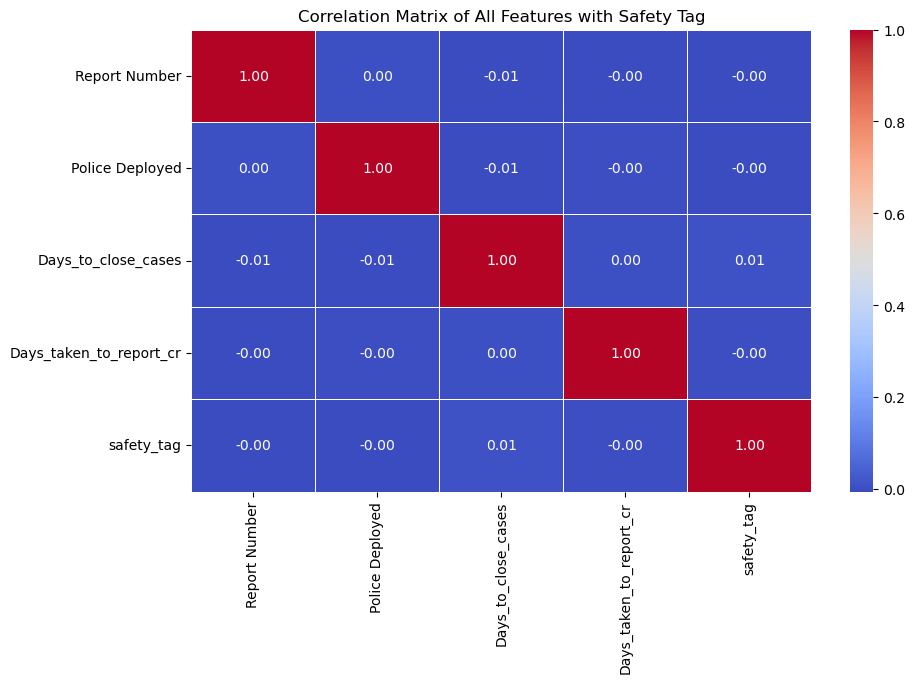

safety_tag                 1.000000
Days_to_close_cases        0.007080
Days_taken_to_report_cr   -0.001093
Police Deployed           -0.001739
Report Number             -0.001760
Name: safety_tag, dtype: float64


In [29]:
from sklearn.preprocessing import LabelEncoder
# Label encode the categorical features to numeric values
label_encoder = LabelEncoder()

df1=df.drop(['safety_zones','Crime_Type'],axis=1)
df1 = df1.select_dtypes(include=[np.number])
df1 = df1.fillna(0)

# Encoding categorical columns
categorical_columns = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used', 
                       'Crime Domain', 'Case Closed', 'Time of Day', 'Victim_age_group', 'safety_tag']  # Add other categorical columns as needed

for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col].astype(str))
if 'safety_tag' in df1.columns:
    df1['safety_tag'] = label_encoder.fit_transform(df1['safety_tag'].astype(str))
if 'safety_tag' not in df1.columns and 'safety_tag' in df.columns:
    df1['safety_tag'] = df['safety_tag']
    df1['safety_tag'] = label_encoder.fit_transform(df1['safety_tag'].astype(str))

# Calculate the correlation matrix
corr_matrix = df1.corr()


# Show correlation matrix with 'safety_tag'
corr_matrix = df1.corr()
if 'safety_tag' in corr_matrix.columns:
    safety_tag_corr = corr_matrix['safety_tag'].sort_values(ascending=False)
    print(safety_tag_corr)
else:
    print("The column 'safety_tag' is missing from the correlation matrix.")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features with Safety Tag')
plt.show()

# Print correlation of all features with 'safety_tag'
print(safety_tag_corr)



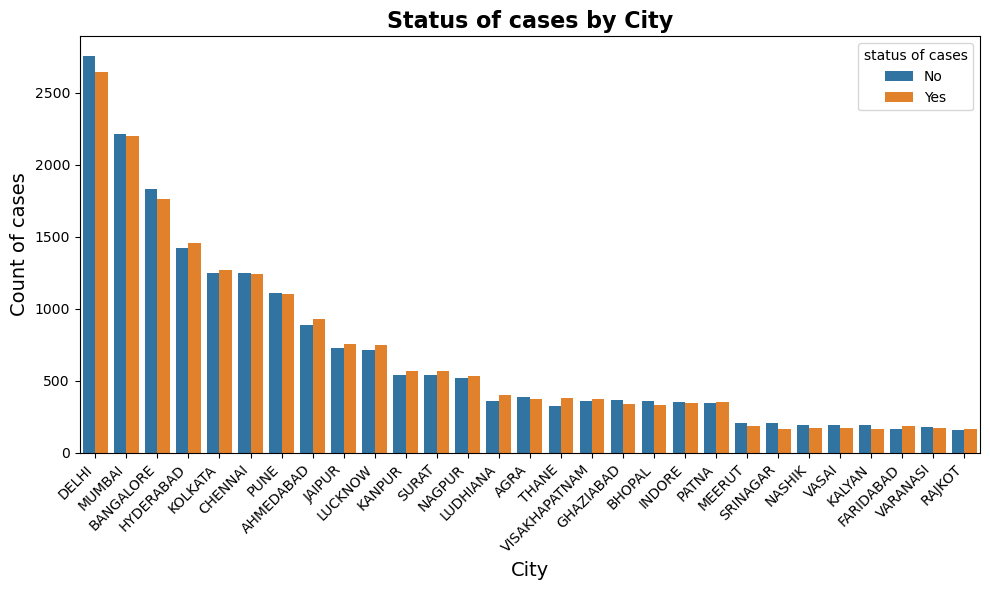

In [30]:
case_closed=df.groupby(['City','Case Closed'])['Report Number'].count().reset_index().sort_values(by='Report Number',ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))

sns.barplot(data=case_closed, x='City', y='Report Number', hue='Case Closed')

# Customizing plot for clarity
plt.title("Status of cases by City", fontsize=16, fontweight='bold')
plt.xlabel("City", fontsize=14)
plt.ylabel("Count of cases", fontsize=14)
plt.legend(title="status of cases", loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

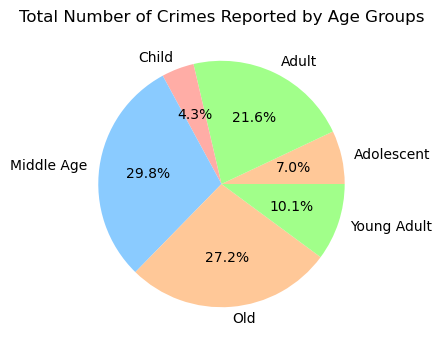

In [31]:
age_groups=df.groupby(['Victim_age_group'])['Report Number'].count().reset_index()
#Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(age_groups['Report Number'], labels=age_groups['Victim_age_group'], autopct='%1.1f%%', colors=['#FFC898', '#A1FF8A', '#FFADA6', '#8ACBFF'])
plt.title("Total Number of Crimes Reported by Age Groups")
plt.show()

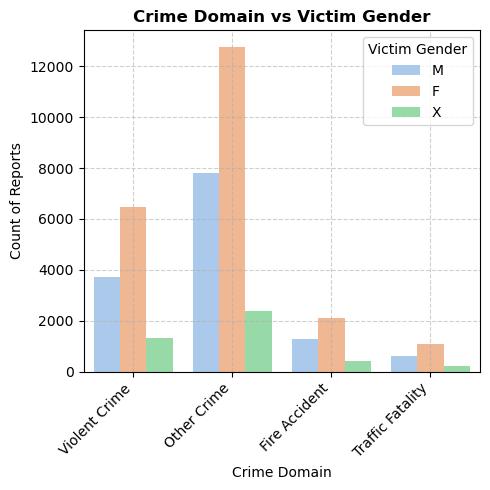

In [32]:
# Plotting Crime Domain vs Victim Gender
plt.figure(figsize=(5, 5))

# Using a color palette 'pastel' for better aesthetics
sns.countplot(data=df, x='Crime Domain', hue='Victim Gender', palette='pastel')

# Customizing the title and labels for better clarity
plt.title('Crime Domain vs Victim Gender', fontsize=12, fontweight='bold')
plt.xlabel('Crime Domain', fontsize=10)
plt.ylabel('Count of Reports', fontsize=10)

# Improving readability with gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()

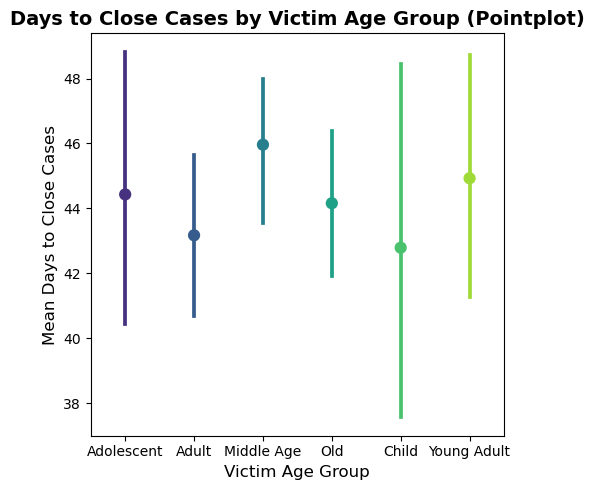

In [33]:
# Plotting Days to Close Cases by Victim Age Group
plt.figure(figsize=(5, 5))

# Creating the pointplot
sns.pointplot(data=df, x='Victim_age_group', y='Days_to_close_cases', palette='viridis', markers='o', linestyles='-', dodge=True)

# Customizing the title and labels for better clarity
plt.title('Days to Close Cases by Victim Age Group (Pointplot)', fontsize=14, fontweight='bold')
plt.xlabel('Victim Age Group', fontsize=12)
plt.ylabel('Mean Days to Close Cases', fontsize=12)

# Displaying the plot
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()